In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
import plots
import pandas as pd
import glob
reload(plots)
reload(helpers)

<module 'helpers' from 'helpers.pyc'>

# Figure 4 notebook

In [2]:
print 'Loading posterior mean dataframe'
df = pickle.load(open('pm_df.p', 'rb'))

print 'Loading posterior sample dictionary'
data_dict = pickle.load(open('indiv_dict.p', 'rb'))

print 'Loading group sample dictionary'
group_dict = pickle.load(open('group_dict.p', 'rb'))

Loading posterior mean dataframe
Loading posterior sample dictionary
Loading group sample dictionary


## Figure 4A: Dependence of meal termination probability on stomach fullness at bout termination

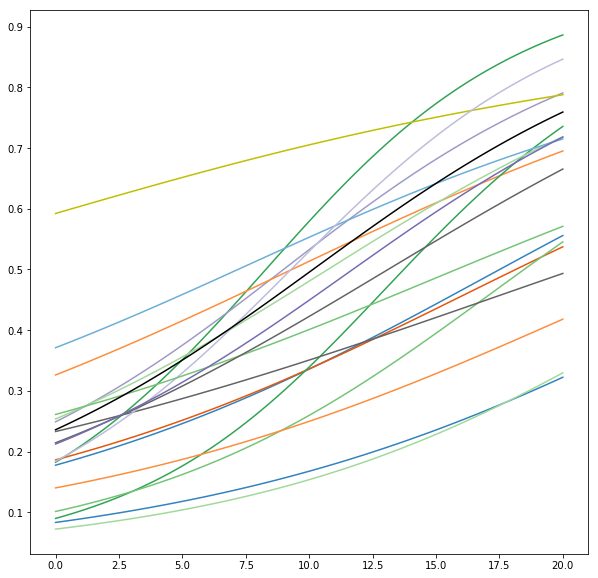

In [3]:
reload(plots)
reload(helpers)

fig, axes = plots.termination_prob(group_dict)

plt.show()

## Figure 4B/C: Individual posterior meal values of stomach dependent and stomach independent meal termination parameters coloured by (B) treatment group and (C) normalised food intake

1.14593304789 0.80605897149


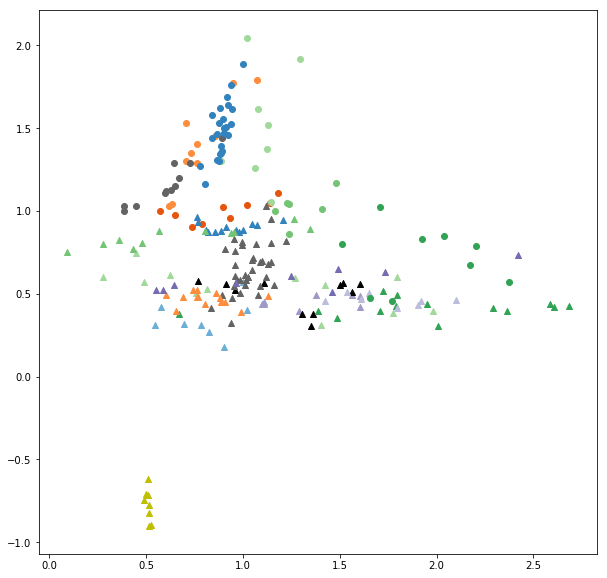

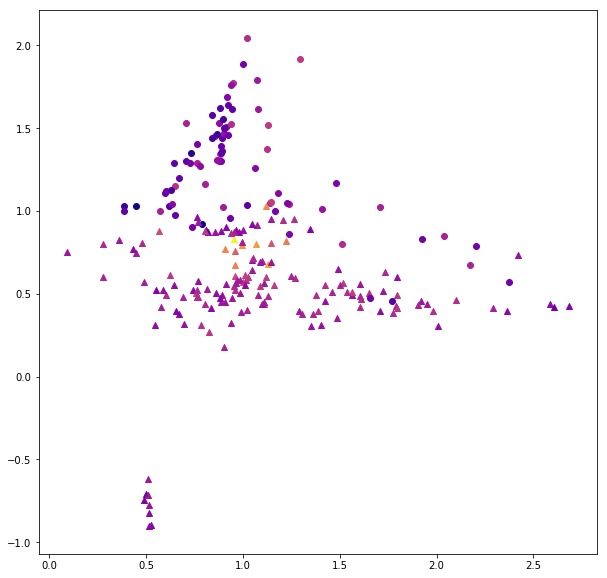

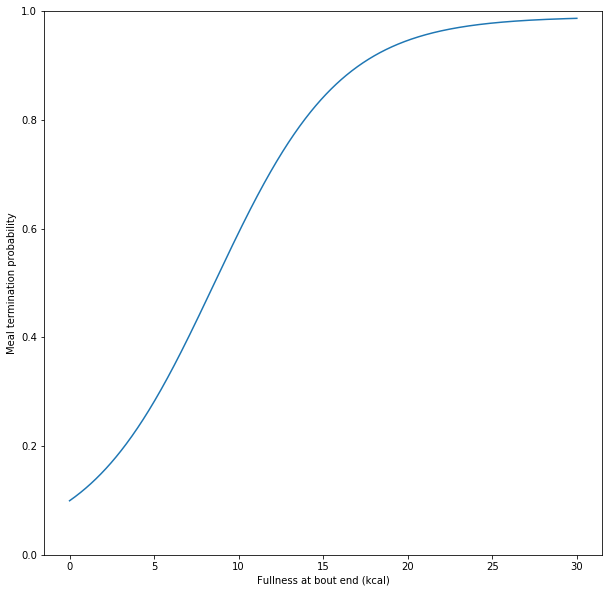

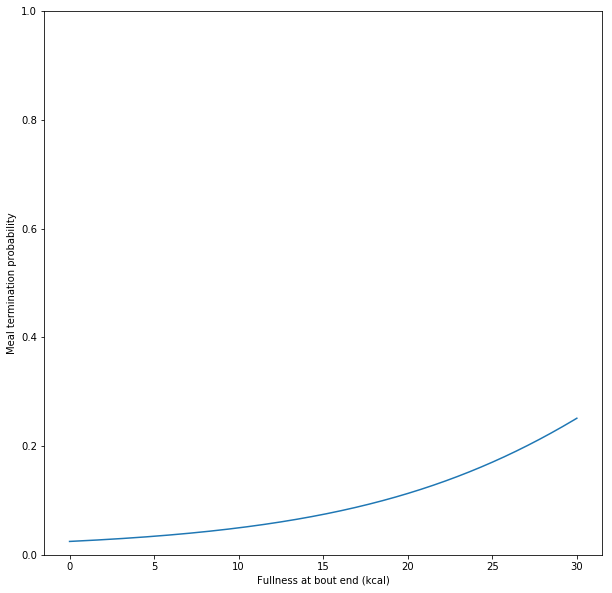

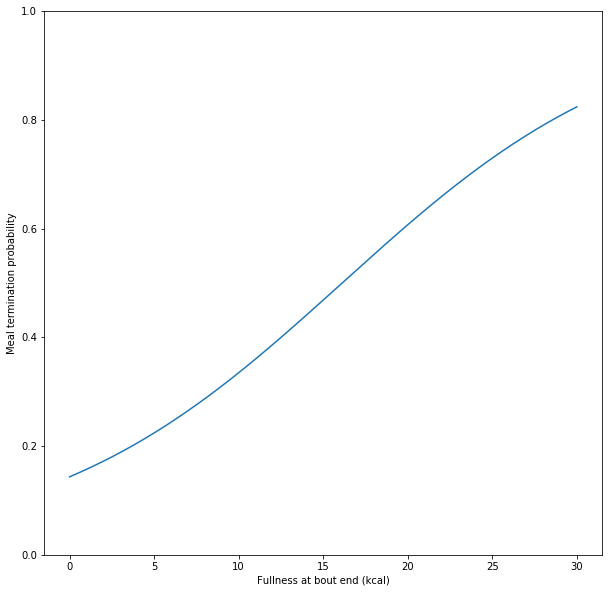

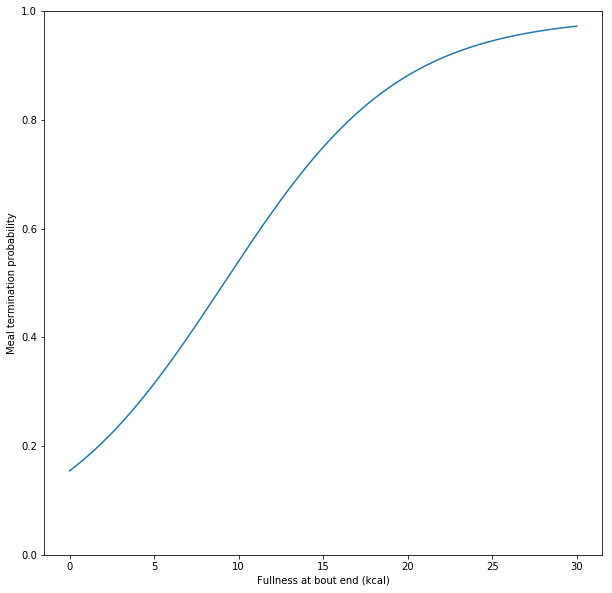

In [4]:
reload(plots)
reload(helpers)

## Main plot
fig, axes = plots.pairplot(df, 'theta4', 'theta5', ctype='drug_c')
fig2, axes2 = plots.pairplot(df, 'theta4', 'theta5', ctype='rate_c')
"""
axes.set_xlim([0, 3])
axes.set_ylim([0, 2.5])

axes2.set_xlim([0, 3])
axes2.set_ylim([0, 2.5])
"""
## Inset for max theta4
sorted_df = df.sort_values('theta4', ascending=False)
theta4 = sorted_df.iloc[0]['theta4']
theta5 = sorted_df.iloc[0]['theta5']
fig3, axes3 = plots.termination_given_params(theta4, theta5)
axes3.set_ylim([0, 1])
axes3.set_xlabel('Fullness at bout end (kcal)')
axes3.set_ylabel('Meal termination probability')

## Inset for max theta5
sorted_df = df.sort_values('theta5', ascending=False)
theta4 = sorted_df.iloc[0]['theta4']
theta5 = sorted_df.iloc[0]['theta5']
fig4, axes4 = plots.termination_given_params(theta4, theta5)
axes4.set_ylim([0, 1])
axes4.set_xlabel('Fullness at bout end (kcal)')
axes4.set_ylabel('Meal termination probability')

## Axes for ad libitum saline in dark period
use_df = df[df['drug'] == 'saline']
use_df = use_df[use_df['adlib'] == 'A']
use_df = use_df[use_df['period'] == 'D']
sorted_df = use_df.sort_values('theta5', ascending=False)
theta4 = sorted_df.iloc[5]['theta4']
theta5 = sorted_df.iloc[5]['theta5']
fig5, axes5 = plots.termination_given_params(theta4, theta5)
axes5.set_ylim([0, 1])
print theta4, theta5
axes5.set_xlabel('Fullness at bout end (kcal)')
axes5.set_ylabel('Meal termination probability')

## Axes for high but not max theta4
sorted_df = df.sort_values('theta4', ascending=False)
theta4 = sorted_df.iloc[15]['theta4']
theta5 = sorted_df.iloc[15]['theta5']
fig6, axes6 = plots.termination_given_params(theta4, theta5)
axes6.set_ylim([0, 1])
axes6.set_xlabel('Fullness at bout end (kcal)')
axes6.set_ylabel('Meal termination probability')

plt.show()

## Figure 4 D/E: Effect of in silico perturbation of stomach dependent and stomach independent meal termination parameters on normalised feeding rate in fasted and ad-libitum fed rats

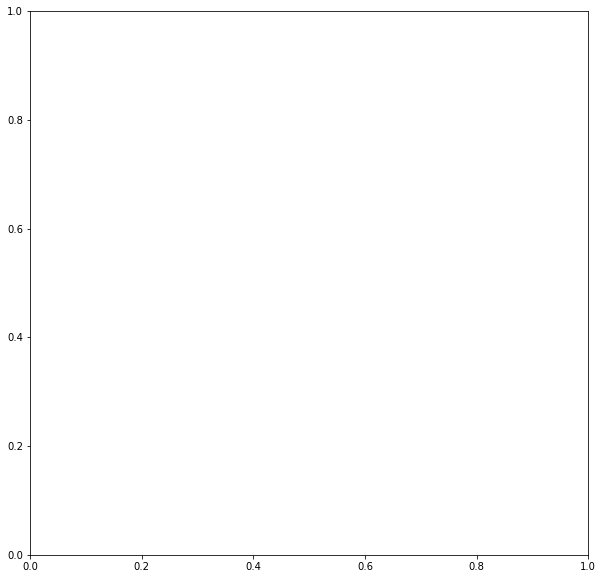

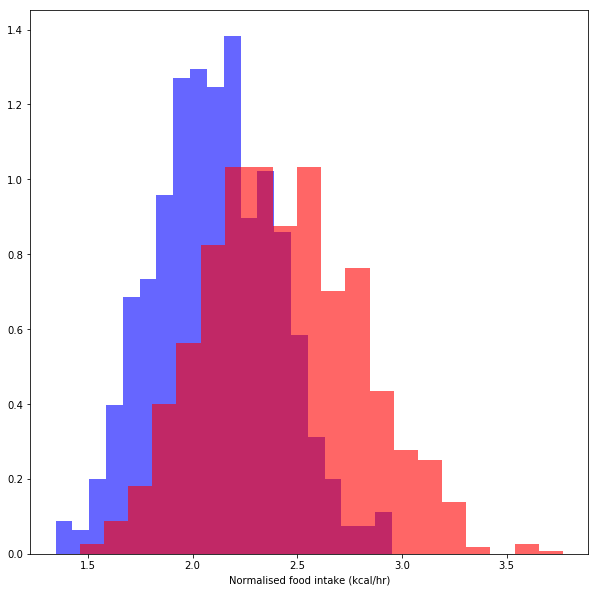

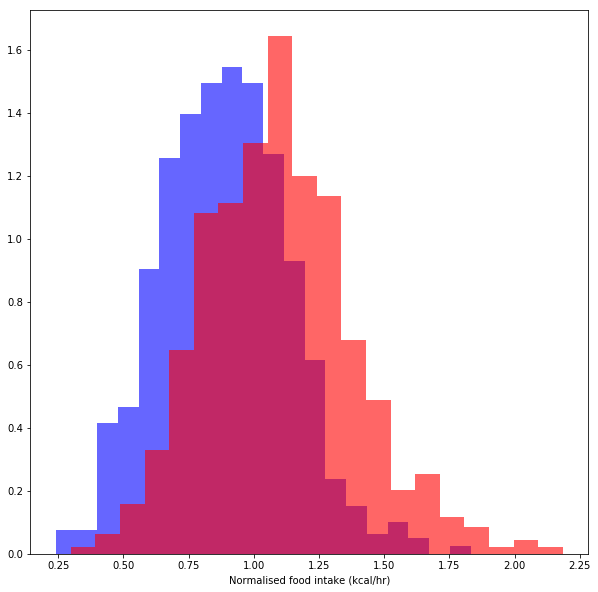

In [21]:
reload(plots)
reload(helpers)

fig, axes = plots.param_change_effect(group_dict,
                                      'PYY_1.5_R_L_trace.p',
                                      4, 
                                      0.5, 
                                      num_samples=1000,
                                      duration=8*60*60)

axes.set_xlabel('Normalised food intake (kcal/hr)')
#axes.set_xlim([1.2, 3.5])

fig2, axes2 = plots.param_change_effect(group_dict,
                                        'saline_0.0_A_L_trace.p',
                                        4, 
                                        0.5, 
                                        num_samples=1000,
                                        duration=8*60*60)

axes2.set_xlabel('Normalised food intake (kcal/hr)')
#axes2.set_xlim([1.2, 3.5])

plt.show()

## Figure 4 E/F: Pairwise parameter perturbations

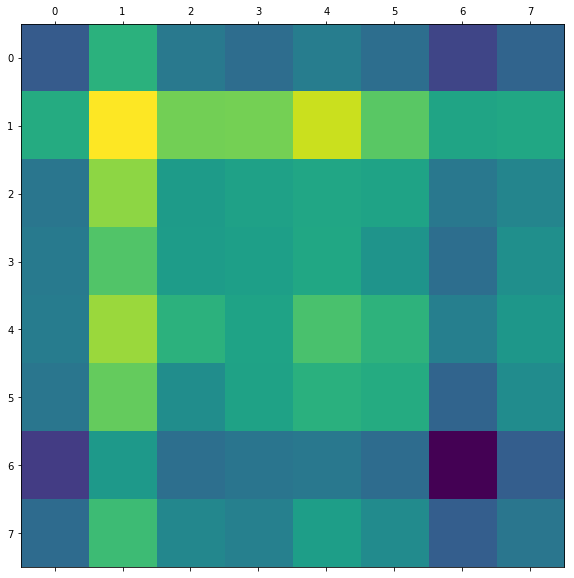

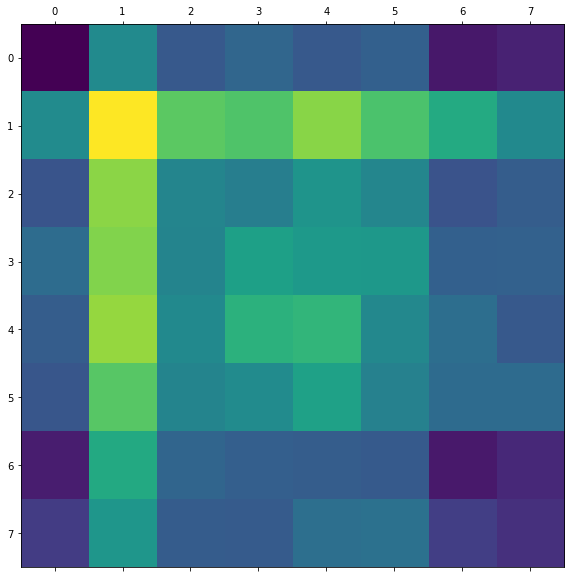

In [6]:
reload(plots)
reload(helpers)

fig, axes = plots.pairwise_param_changes(group_dict,
                                         'saline_0.0_A_D_trace.p',
                                         delta=0.1,
                                         num_samples=100,
                                         duration=8*60*60)

fig2, axes2 = plots.pairwise_param_changes(group_dict,
                                           'saline_0.0_R_D_trace.p',
                                           delta=0.1,
                                           num_samples=100,
                                           duration=8*60*60)

plt.show()

## Figure 4G: Parameter delta curve - in silico replication of CGRP neuron silencing indicates that the feeding reduction effect cannot solely be down to meal size reduction: feeding rate reduction, within-bout pause duration, or bout duration must also be affected

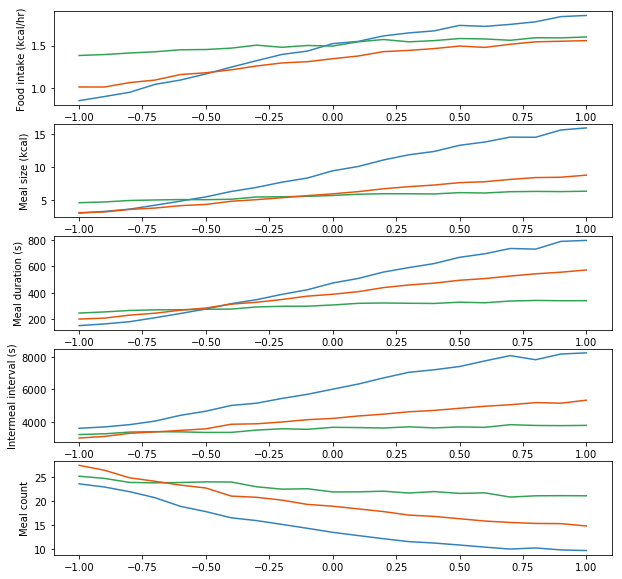

In [52]:
reload(plots)
reload(helpers)
"""
indivs = ['saline_0.0_A_L_trace.p',
          'saline_0.0_R_L_trace.p', 
          'PYY_1.5_R_L_trace.p',
          'PYY_7.5_R_L_trace.p',
          'PYY_300.0_R_L_trace.p']
"""

indivs = ['saline_0.0_R_L_trace.p',
          'PYY_300.0_R_L_trace.p',
          'LiCl_64.0_R_L_trace.p']

"""
indivs = ['saline_0.0_R_D_trace.p',
          'saline_0.0_A_D_trace.p']

"""
fig, axes = plots.param_delta_curve(group_dict,
                                    indivs,
                                    3,
                                    np.linspace(-1, 1, 21),
                                    num_samples=100,
                                    duration=24*60*60)

axes[0].set_xlabel('Parameter change (a.u.)')
axes[0].set_ylabel('Food intake (kcal/hr)')
axes[1].set_ylabel('Meal size (kcal)')
axes[2].set_ylabel('Meal duration (s)')
axes[3].set_ylabel('Intermeal interval (s)')
axes[4].set_ylabel('Meal count')
plt.show()